In [47]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt

## Вся суть XYZ-анализа в одном примере

Для XYZ-анализа нам понадобится статистика по продажам товаров за несколько месяцев. Смысл метода — понять, насколько устойчив спрос на товар в разные периоды.

Для примера возьмем условный магазин канцтоваров. Ассортимент ограничим десятью позициями — чтобы не усложнять.

In [12]:
products.style.set_table_attributes("style='display:inline'") \
              .set_caption("Ассортимент и продажи магазина канцтоваров для XYZ-анализа")

,Январь,Февраль,Март,Апрель,Май,Июнь
Авторучки,150,140,120,150,140,140
Маркеры,120,120,120,100,110,110
Тетради в линейку,200,180,190,180,170,150
Тетради в клетку,170,180,180,170,170,160
Общие тетради,130,120,140,110,100,90
"Альбомы для рисования, А4",20,10,50,30,20,5
Блокноты,15,20,10,5,4,2
Нотные тетради,50,70,50,60,40,30
Дневники,200,100,50,20,40,0
Пеналы,100,80,70,60,50,10


Теперь задача — рассчитать, как меняется объем продаж по каждому товару от месяца к месяцу. Этот показатель измеряется в процентах и называется коэффициентом вариации.

А теперь самое главное — сортируем товар по группам согласно коэффициенту вариации:

- 0-10% — группа X, товары с самым устойчивым спросом
- 10 до 25% — группа Y, середнячки.
- 25+% — группа Z, товары со случайным спросом.

In [25]:
products['Коэфициент вариации'] = products.apply(lambda x: 100 * np.std(x) / np.mean(x), axis=1)

In [27]:
def get_xyz_group(var):
    if var <= 10:
        return 'X'
    elif 10 < var <= 25:
        return 'Y'
    else:
        return 'Z'

In [28]:
products['Группа'] = products['Коэфициент вариации'].apply(set_group)

In [30]:
products.sort_values('Коэфициент вариации').style \
        .set_caption('Результаты XYZ-анализа. \
                      Товары распределились по группам по мере увеличения колебаний спроса по месяцам.')

,Январь,Февраль,Март,Апрель,Май,Июнь,Коэфициент вариации,Группа
Тетради в клетку,170,180,180,170,170,160,4.003015,X
Маркеры,120,120,120,100,110,110,6.576671,X
Авторучки,150,140,120,150,140,140,7.142857,X
Тетради в линейку,200,180,190,180,170,150,8.816805,X
Общие тетради,130,120,140,110,100,90,14.850653,Y
Нотные тетради,50,70,50,60,40,30,25.819889,Z
Пеналы,100,80,70,60,50,10,45.305553,Z
"Альбомы для рисования, А4",20,10,50,30,20,5,65.105170,Z
Блокноты,15,20,10,5,4,2,68.790572,Z
Дневники,200,100,50,20,40,0,97.225031,Z


Самый устойчивый спрос на тетради в линейку, маркеры, авторучки, тетради в клетку и общие тетради. Коэффициент вариации по ним — в пределах 10%. И все они — наши лидеры, группа X.

Нотные тетради попали с коэффициентом вариации 20,66% в группу Y — середнячки.

Все остальное — аутсайдеры из группы Z с коэффициентом вариации больше 25%.

## Как пользоваться информацией, которую дал XYZ-анализ
По завершении XYZ-анализа мы видим товары с самым стабильным спросом, середнячков по этому параметру и аутсайдеров. Информация о том, к какой группе относится товар — основа для принятия решений.

Товары из группы X — те самые, ради которых к вам идет основной поток покупателей. Поэтому они обязательно должны быть на прилавке/складе.

В группе Y собрались середнячки. Их присутствие на складе и прилавке остается на усмотрение руководителя. Закупать в таком количестве, как лидеров по спросу, нет смысла. На них спрос тоже есть, но погоды он не делает.

А вот от группы Z можно и отказаться или поставлять попавшие в нее товары по предзаказу. Спрос на этот товар случайный.

Вне зависимости от того, применяем ли мы только XYZ- или оба вида анализа, необходимо помнить — у XYZ-анализа есть подводный камень.

## Подводный камень XYZ-анализа
При всем удобстве XYZ-анализа у него есть огромный недостаток. Коэффициент вариации сильно зависит от сезонности спроса. И это снижает точность прогнозирования.

Мы не случайно выбрали для примера канцелярку. Спрос на этот товар зависит от сезона: продажи активизируются в августе, в преддверии учебного года. А с началом летних каникул в июне — спад.

Поэтому если мы исключим из анализа статистику продаж по июню, получим совсем другие результаты.

In [35]:
products_5months = products.loc[:, 'Январь':'Май']

In [ ]:
products_5months['Коэфициент вариации'] = products_5months.apply(lambda x: 100 * np.std(x) / np.mean(x), axis=1)
products_5months['XYZ'] = products_5months['Коэфициент вариации'].apply(get_xyz_group)

In [39]:
products_5months.sort_values('Коэфициент вариации').style \
                .set_caption('Результат XYZ-анализа без учета сезонного падения спроса в июне \
                             — распределение товаров между группами отличается от варианта \
                             с учетом июньской статистики продаж. Разнятся и коэффициенты \
                             вариации одних и тех же товаров.')

,Январь,Февраль,Март,Апрель,Май,Коэфициент вариации,Группа
Тетради в клетку,170,180,180,170,170,2.815505,X
Тетради в линейку,200,180,190,180,170,5.542413,X
Маркеры,120,120,120,100,110,7.017544,X
Авторучки,150,140,120,150,140,7.824608,X
Общие тетради,130,120,140,110,100,11.785113,Y
Нотные тетради,50,70,50,60,40,18.885257,Y
Пеналы,100,80,70,60,50,23.895348,Y
"Альбомы для рисования, А4",20,10,50,30,20,52.171769,Z
Блокноты,15,20,10,5,4,55.985987,Z
Дневники,200,100,50,20,40,78.807290,Z


Чтобы прогноз был максимально точным, надо разбить период XYZ-анализа на сезоны. И каждый сезон анализировать отдельно. А свои высокие и низкие сезоны бизнесмены знают.

## Проверка по деньгам
Все товары, которые вы подвергаете XYZ-анализу, полезно протестировать еще одним методом. Он позволяет выявить товары, которые в сумме приносят бизнесу наибольшую прибыль, это — АВС-анализ. В детали вдаваться не будем — это тема отдельной статьи. Скажем лишь главное. В основе АВС-анализа лежит принцип Паретто — 20/80: 20% товаров приносят бизнесу 80% прибыли. Результат АВС-анализа — распределение товаров на три группы:

- А — лидеры, на которых бизнес делает 80% выручки или прибыли;
- В — середнячки, которые приносят бизнесу еще 15%;
- С — аутсайдеры, суммарная доля которых в прибыли или выручке — оставшиеся 5%.

Анализировать один набор товаров обоими методами полезно, потому что по результатам группа X и группа А не всегда совпадают. И если товар из группы А одновременно находится в группе Z, то есть вносит лепту в основную прибыль бизнеса, но маловостребован — это повод для размышлений.

Разница между XYZ- и АВС-анализом — широта охвата. Оба относятся к инструментам стратегического планирования. Но АВС-анализ более оперативен, чем XYZ. Его можно сделать по итогам первого месяца работы и откорректировать планы на ближайший. А вот XYZ-анализ, который нужен, чтобы выявить колебания спроса от месяца к месяцу, проводить так часто смысла нет. Оптимально — по итогам минимум четырех месяцев с поправкой на сезонность. Если торгуете пляжными принадлежностями или кремом для загара, нет смысла сравнивать июньские продажи с январскими.

Для максимальной наглядности сделаем АВС-анализ по прибыли для товаров из нашего примера. Помесячно анализировать не нужно — достаточно общей суммы выручки или прибыли по каждому товару за тот же период, по которому мы делали XYZ-анализ.

In [81]:
products_abc = pd.DataFrame({'Товары': products.index,
                             'Прибыль': [220000, 40000, 570000,
                                         600000, 150000, 50000,
                                         30000, 330000, 70000, 120000]
                             })

In [78]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax1.bar(x, y, alpha=0.5)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.tick_params(axis='x', labelrotation=60)
    ax1.set(frame_on=False)
    
    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), xytext=(-8,8), textcoords='offset points', fontweight='heavy')    
    
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.box(False)
    plt.show()
    

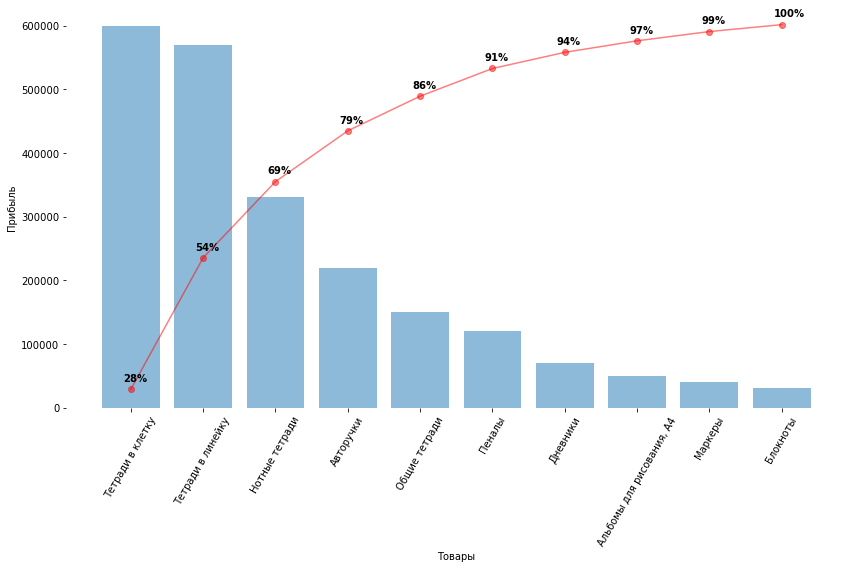

In [79]:
pareto_plot(products_abc, x='Товары', y='Прибыль')

In [92]:
products_abc = products_abc.sort_values('Прибыль', ascending=False)
products_abc['Суммарная доля'] = products_abc['Прибыль'] \
                    .apply(lambda x: x / products_abc['Прибыль'].sum()).cumsum()

In [96]:
def get_group_abc(part):
    if part <= 80:
        return 'A'
    elif 80 < part <= 95:
        return 'B'
    else:
        return 'C'

In [98]:
products_abc['ABC'] = (products_abc['Суммарная доля'] * 100).apply(get_group_abc)

In [111]:
products_abc['XYZ'] = products_abc['Товары'].map(products['XYZ'])

Таблица примет вот такой вид:

In [112]:
products_abc

,Товары,Прибыль,Суммарная доля,ABC,XYZ
3,Тетради в клетку,600000,0.275229,A,X
2,Тетради в линейку,570000,0.536697,A,X
7,Нотные тетради,330000,0.688073,A,Z
0,Авторучки,220000,0.788991,A,X
4,Общие тетради,150000,0.857798,B,Y
9,Пеналы,120000,0.912844,B,Z
8,Дневники,70000,0.944954,B,Z
5,"Альбомы для рисования, А4",50000,0.967890,C,Z
1,Маркеры,40000,0.986239,C,X
6,Блокноты,30000,1.000000,C,Z


Теперь мы видим, к какой группе по обоим видам анализа относится каждый товар.

А окончательным результатом XYZ-анализа и ABC-анализа должна стать вот такая таблица:

In [123]:
pd.crosstab(products_abc['ABC'],
            products_abc['XYZ'],
            values=products_abc['Товары'],
            aggfunc=lambda x: ', '.join(list(x))).fillna('')

XYZ,X,Y,Z
ABC,,,
A,"Тетради в клетку, Тетради в линейку, Авторучки",,Нотные тетради
B,,Общие тетради,"Пеналы, Дневники"
C,Маркеры,,"Альбомы для рисования, А4, Блокноты"


Товары из категорий АХ, ВХ и AY должны быть на складе всегда. AZ, BY и CX — на усмотрение собственника. BZ, CY и CZ — держать не нужно или по минимуму.

Теперь мы знаем — тетради в клетку, в линейку, авторучки и нотные тетради должны быть на складе всегда. Общие тетради, пеналы и маркеры — по усмотрению руководителя. А дневников, альбомов и блокнотов если и делать запасы, то минимальные.

- **Группа АХ** — самые интересные товары. Тяжеловесы по всем параметрам — самые востребованные и приносящие львиную долю прибыли. Если их не будет достаточно на прилавке и на складе, просадка по выручке нам обеспечена.
- **Группы ВХ** — на этих товарах меньше зарабатываем, но они также востребованы. Их дефицит на складе и прилавке ударит по выручке. Не так болезненно, как в случае с тяжеловесами из группы АХ. Но тоже ощутимо.
- **Группа АY** — устойчивого спроса нет. Но по деньгам, что приносят бизнесу, держатся в лидерах. Значит, есть смысл позаботиться и об их достаточном количестве.
- **Группа АZ** хоть и вошла в число лидеров по приносимым деньгам, мало влияет на прибыль или выручку в силу малой востребованности. Поэтому сочтет нужным руководитель от нее отказаться или сделать некоторый запас — не критично.
- **Остальные** — чем ближе к правому нижнему углу итоговой таблицы, тем меньше востребованность, доля в прибыли или выручке бизнеса. А значит — тем меньше надобность в их запасах и тем безболезненнее можно отказаться от этих товаров совсем или перейти к поставкам только под заказ.

Чтобы определить, сколько товара из групп AX, AY и BX должно быть на складе, нужно учесть срок поставки с момента заказа и максимально возможные продажи за период поставки.